# TASK # 1
Assigned: 15-07-2024 

Submission date: 30-07-2024

Topic: House Price Analysis and Prediction

Objective: Analyze a dataset of house prices to understand pricing factors, identify outliers, and develop a model for future price prediction.

# 1. Data Cleaning and Exploration:


1.1 Clean the data: Identify and handle missing values, inconsistencies,
and outliers.

In [173]:
import numpy as np
import pandas as pd

In [174]:
# Load the dataset
df = pd.read_csv(r'D:\Data_science_Projects\Task-1\zameen-updated.csv')

# Display the first few rows of the dataframe
df.head()


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [175]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64


In [178]:
# checking duplicates 
duplicate_rows=df[df.duplicated()]
duplicate_rows

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category


In [179]:
 # Handle missing values (for simplicity, using mean imputation)
data.fillna(data.mean(numeric_only=True), inplace=True)

In [180]:
# Numbers of duplicate rows 
duplicate_rows= df[df.duplicated()]
num_duplicate_rows=len(duplicate_rows)
print("Number of duplicate rows:", num_duplicate_rows )

Number of duplicate rows: 0


In [181]:
# Fill missing values in numeric columns with median
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [182]:

# Drop rows with missing values in non-numeric columns
df.dropna(subset=df.select_dtypes(exclude='number').columns, inplace=True)

In [183]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area Type        0
Area Size        0
Area Category    0
dtype: int64


In [184]:
# Ensure consistency in categorical columns
df['property_type'] = df['property_type'].str.lower()
df['location'] = df['location'].str.lower()
df['city'] = df['city'].str.lower()
df['province_name'] = df['province_name'].str.lower()
df['area'] = df['area'].str.lower()
df['purpose'] = df['purpose'].str.lower()
df['agency'] = df['agency'].str.lower()
df['agent'] = df['agent'].str.lower()
df['Area Type'] = df['Area Type'].str.lower()
df['Area Category'] = df['Area Category'].str.lower()


In [185]:
# Convert columns to appropriate data types
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['Area Size'] = pd.to_numeric(df['Area Size'], errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [186]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,house,7000000,dha defence,islamabad,islamabad capital,33.492591,73.301339,3,8 marla,for sale,3,2019-07-10,easy property,muhammad junaid ceo muhammad shahid director,marla,8.0,5-10 marla
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,flat,7800000,e-11,islamabad,islamabad capital,33.698244,72.984238,2,6.2 marla,for sale,2,2019-05-05,ettemad enterprises,balqiaz marwat,marla,6.2,5-10 marla
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,house,50000000,dha defence,islamabad,islamabad capital,33.540894,73.095732,7,1 kanal,for sale,7,2018-10-19,easy property,muhammad junaid ceo muhammad shahid director,kanal,1.0,1-5 kanal
9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,penthouse,40000000,f-11,islamabad,islamabad capital,33.679211,72.988787,5,1 kanal,for sale,5,2019-06-27,crown associate,abrar ahmed,kanal,1.0,1-5 kanal
10,1425602,429,https://www.zameen.com/Property/islamabad_dipl...,flat,35000000,diplomatic enclave,islamabad,islamabad capital,33.728873,73.119628,3,7.1 marla,for sale,3,2019-06-03,al sahar estate,zahid h. usmani,marla,7.1,5-10 marla


In [187]:
# Standardize Area Type
df['Area Type'] = df['Area Type'].str.strip().str.capitalize()
# Standardize Area Category
df['Area Category'] = df['Area Category'].str.strip()
df['property_type'] = df['property_type'].str.strip().str.capitalize()
df['location'] = df['location'].str.strip().str.capitalize()
df['city'] = df['city'].str.strip().str.capitalize()
df['province_name'] = df['province_name'].str.strip().str.capitalize()
df['area'] = df['area'].str.strip().str.capitalize()
df['purpose'] = df['purpose'].str.strip().str.capitalize()
df['agency'] = df['agency'].str.strip().str.capitalize()
df['agent'] = df['agent'].str.strip().str.capitalize()

In [188]:
# Define a function to find outliers using IQR
def find_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

# Identify outliers in price and Area Size
price_outliers = find_outliers_IQR(df['price'])
area_size_outliers = find_outliers_IQR(df['Area Size'])

print("Price outliers:")
print(price_outliers)

print("Area Size outliers:")
print(area_size_outliers)

Price outliers:
17         80000000
28        100000000
31        220000000
34        230000000
47        220000000
            ...    
168411    185000000
168414     82500000
168419     55000000
168427     55000000
168429    170000000
Name: price, Length: 10116, dtype: int64
Area Size outliers:
28        17.8
273       17.0
289       17.0
304       17.0
366       18.0
          ... 
168201    25.0
168251    23.0
168302    40.0
168379    17.0
168406    17.0
Name: Area Size, Length: 992, dtype: float64


In [189]:

# Remove outliers
df = df[~df['price'].isin(price_outliers)]
df = df[~df['Area Size'].isin(area_size_outliers)]

In [190]:
#Maximum values
max_values = {'price': df['price'].max(),
              'latitude':df['latitude'].max(),
              'longitude':df['longitude'].max(),
              'baths':df['baths'].max(),
              'bedrooms':df['bedrooms'].max(),
              'Area Size':df['Area Size'].max()
              }

In [191]:

print("Maximum Values:")
for i , max_value in max_values.items():
  print(f"{i}:{max_value}")

Maximum Values:
price:52000000
latitude:73.184088
longitude:74.564727
baths:403
bedrooms:68
Area Size:16.5


In [192]:
# Get unique property types
unique_property_types = df['property_type'].unique()

# Print unique property types
print("Unique property types:")
for property_type in unique_property_types:
    print(property_type)

Unique property types:
House
Flat
Penthouse
Lower portion
Upper portion
Farm house
Room


In [193]:

# Get unique city types
unique_city_types = df['city'].unique()
print("City Types:")
for city_type in unique_city_types:
  print(city_type)

City Types:
Islamabad
Lahore
Rawalpindi
Karachi
Faisalabad


In [194]:

#Get purpose
purpose_of_property = df['purpose'].unique()
print("Purpose:")
for purpose in purpose_of_property:
  print(purpose)

Purpose:
For sale
For rent


In [195]:
#Area Type
area_type = df['Area Type'].unique()
print("Area Type:")
for area in area_type:
  print(area)

Area Type:
Marla
Kanal


In [196]:
max_baths_index = df['baths'].idxmax()
# Get the row with the maximum number of baths
row_max_baths = df.loc[max_baths_index]
# Print the row
print("Row with the maximum number of baths:")
print(row_max_baths)

Row with the maximum number of baths:
property_id                                               17101832
location_id                                                    587
page_url         https://www.zameen.com/Property/rawalpindi_kha...
property_type                                                House
price                                                     15000000
location                                       Khayaban-e-sir syed
city                                                    Rawalpindi
province_name                                               Punjab
latitude                                                 33.638847
longitude                                                73.048089
baths                                                          403
area                                                       5 marla
purpose                                                   For sale
bedrooms                                                         6
date_added              

1.2 Explore the data: Analyze the distribution of house prices and other features. Identify potential relationships between features and price using visualizations (scatter plots, box plots, etc.).


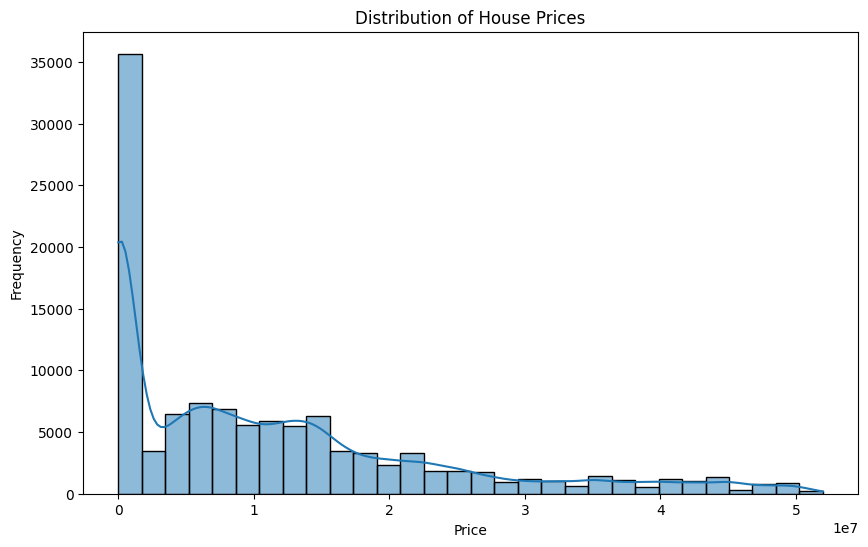

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

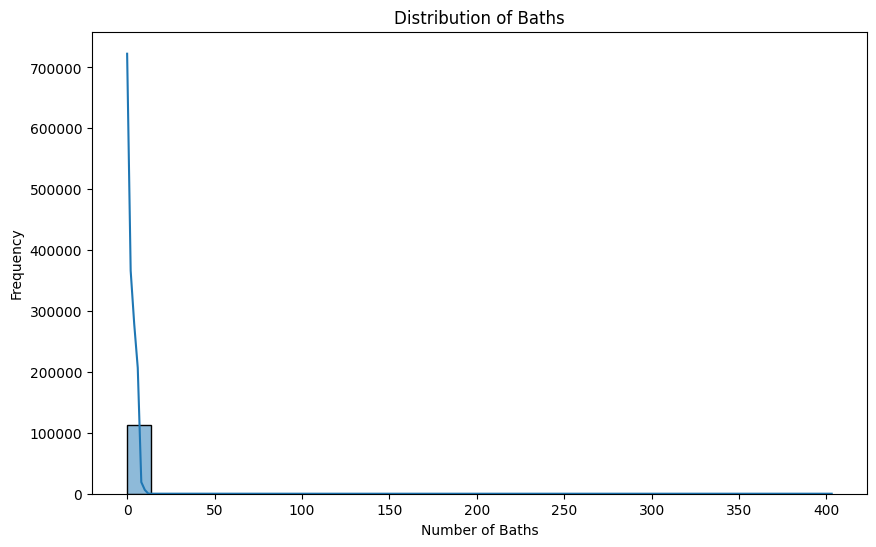

In [198]:
# Plot histogram of baths
plt.figure(figsize=(10, 6))
sns.histplot(df['baths'], kde=True, bins=30)
plt.title('Distribution of Baths')
plt.xlabel('Number of Baths')
plt.ylabel('Frequency')
plt.show()

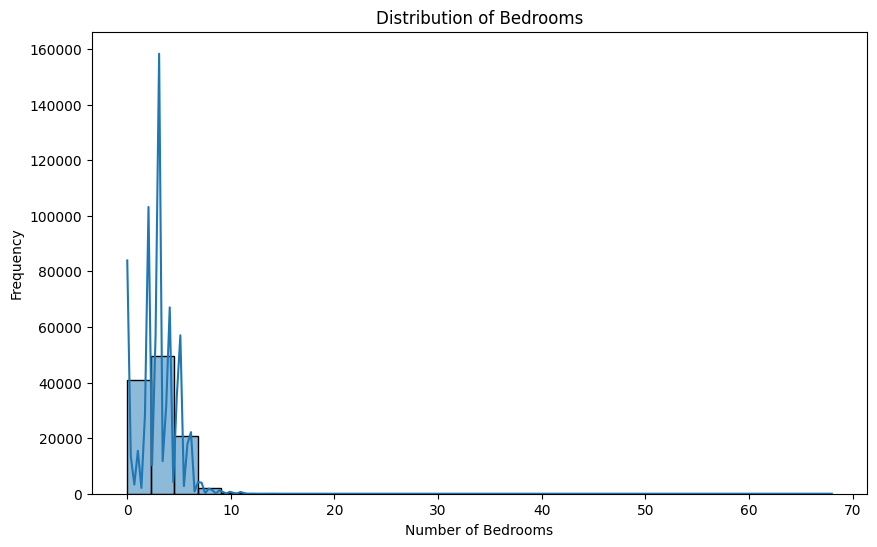

In [199]:
# Plot histogram of bedrooms
plt.figure(figsize=(10, 6))
sns.histplot(df['bedrooms'], kde=True, bins=30)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

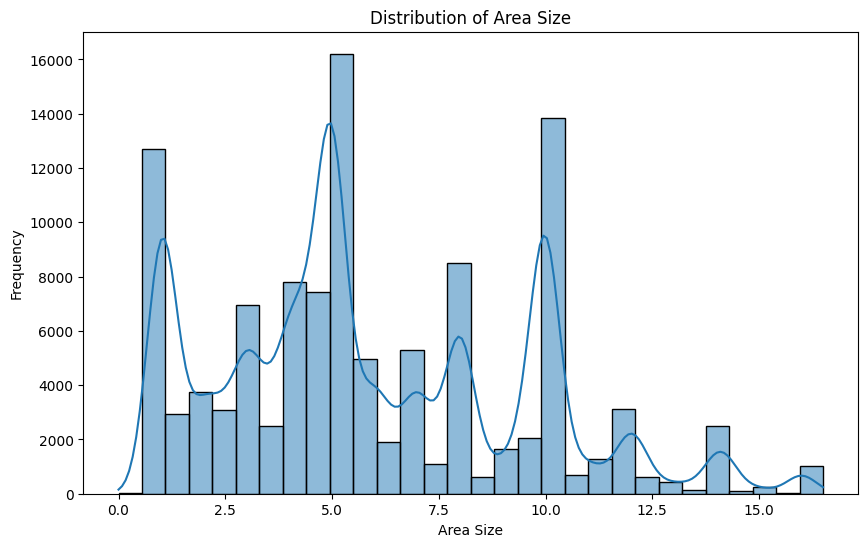

In [200]:
# Plot histogram of Area Size
plt.figure(figsize=(10, 6))
sns.histplot(df['Area Size'], kde=True, bins=30)
plt.title('Distribution of Area Size')
plt.xlabel('Area Size')
plt.ylabel('Frequency')
plt.show()

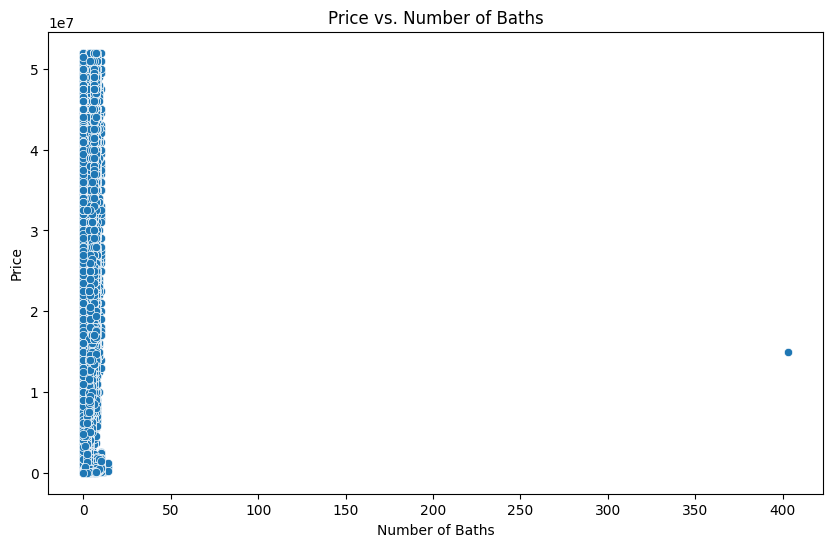

In [201]:
# Scatter plot of price vs baths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='baths', y='price', data=df)
plt.title('Price vs. Number of Baths')
plt.xlabel('Number of Baths')
plt.ylabel('Price')
plt.show()

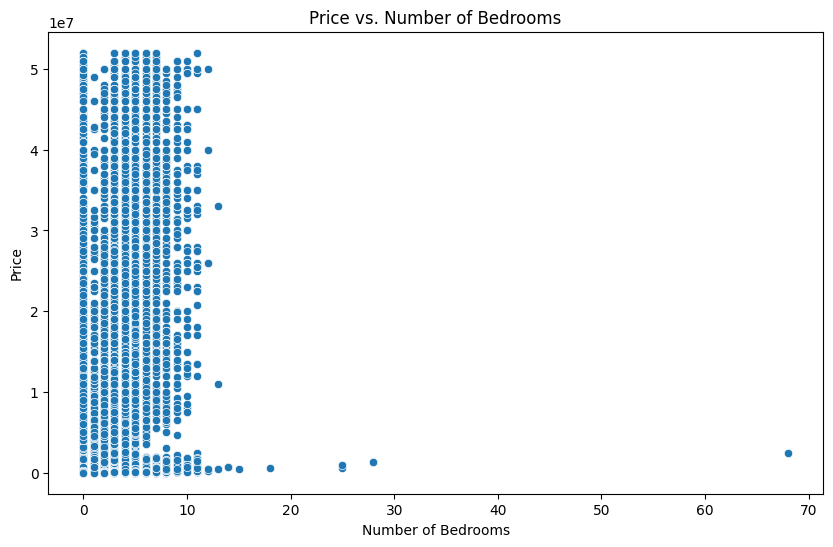

In [202]:
# Scatter plot of price vs bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

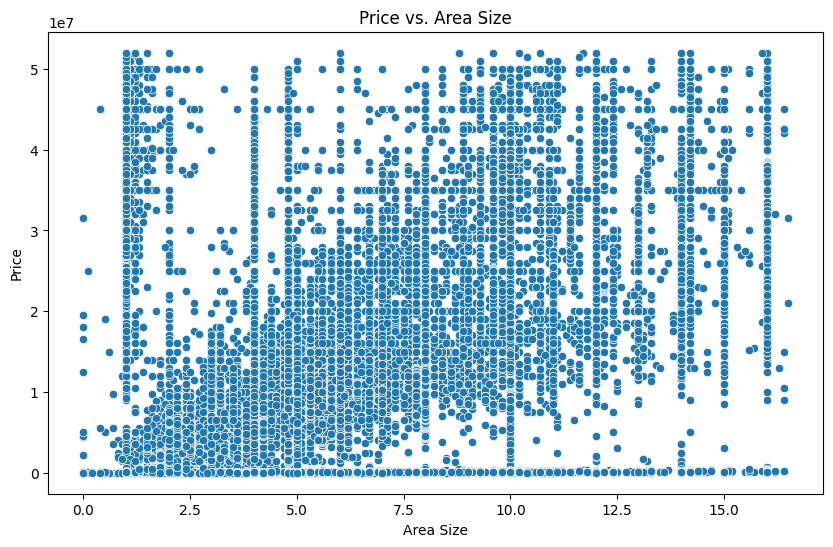

In [203]:
# Scatter plot of price vs Area Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area Size', y='price', data=df)
plt.title('Price vs. Area Size')
plt.xlabel('Area Size')
plt.ylabel('Price')
plt.show()

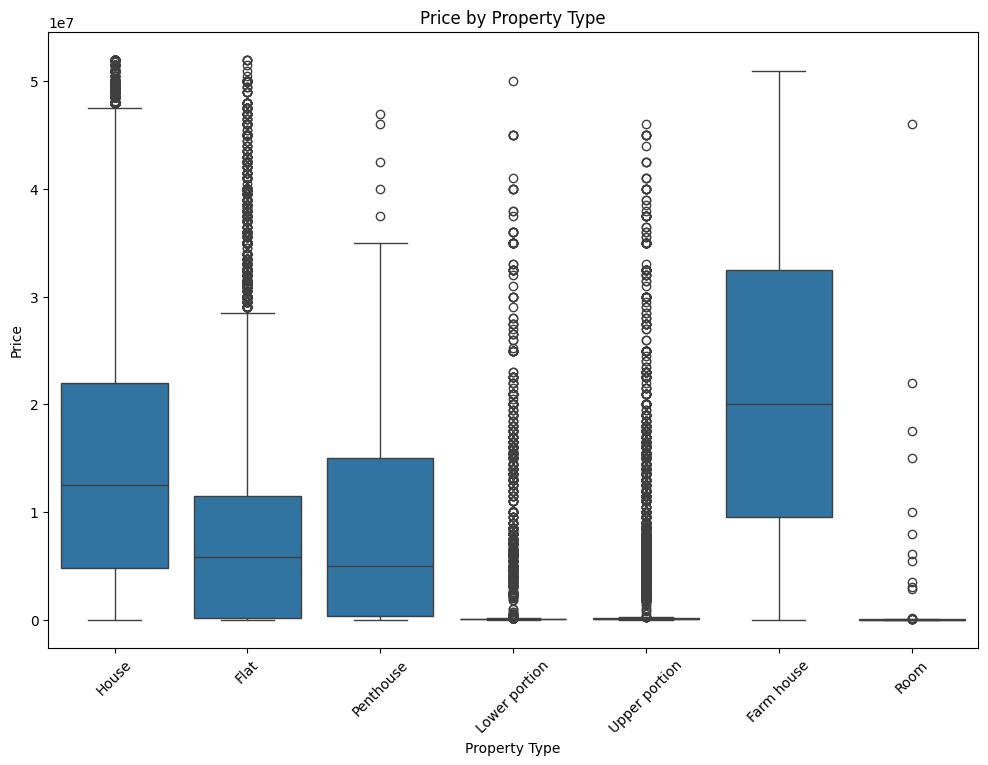

In [204]:
# Box plot of price by property type
plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='price', data=df)
plt.title('Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# 2. Feature Engineering:


2.1 Create new features that might be relevant for price prediction (e.g.,
age of the house, number of bedrooms per floor).

In [206]:
# Create New Features

# Total Number of Rooms
df['total_rooms'] = df['bedrooms'] + df['baths']

In [207]:
# Price per Area Unit
df['price_per_area_unit'] = df['price'] / df['Area Size']


2.2 Consider encoding categorical features (e.g., location) into numerical values suitable for modeling.


In [208]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [209]:
# Encode 'location'
df['location_encoded'] = label_encoder.fit_transform(df['location'])

In [210]:
# Encode 'city'
df['city_encoded'] = label_encoder.fit_transform(df['city'])

In [211]:
# Encode 'province_name'
df['province_name_encoded'] = label_encoder.fit_transform(df['province_name'])

In [212]:
# Encode 'property_type'
df['property_type_encoded'] = label_encoder.fit_transform(df['property_type'])


# 3. Outlier Analysis:


3.1 Identify houses with significantly higher or lower prices compared to
similar properties.


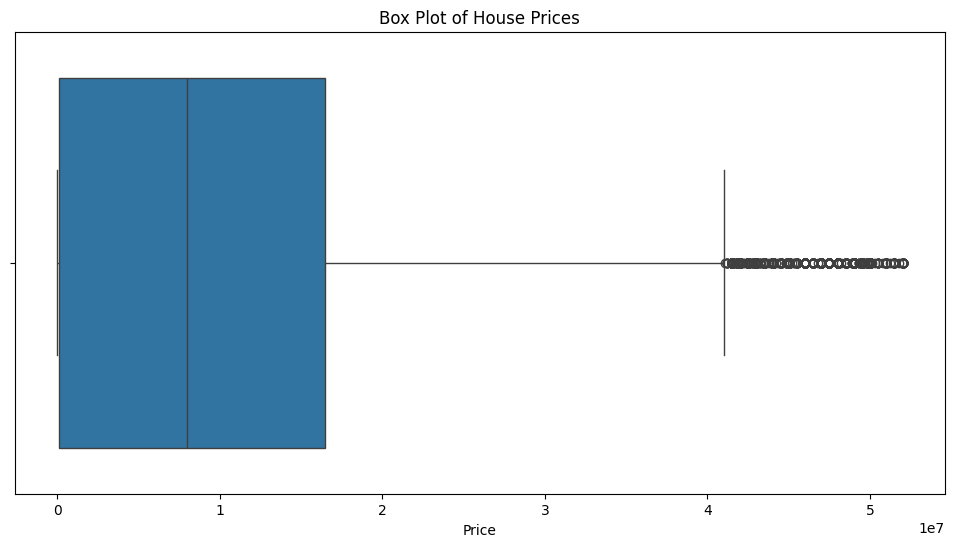

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Identify Outliers

# Box Plot for Price
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.show()

In [215]:
# Z-Score Method
from scipy.stats import zscore

df['price_zscore'] = zscore(df['price'])

# Define a threshold for identifying outliers (e.g., |z| > 3)
outliers = df[np.abs(df['price_zscore']) > 3]

print("Outliers based on price:")
print(outliers[['property_id', 'price', 'location', 'baths', 'bedrooms', 'Area Size', 'property_type']])
     

Outliers based on price:
        property_id     price     location  baths  bedrooms  Area Size  \
8           1402466  50000000  Dha defence      7         7        1.0   
52           785289  52000000      Gulberg      6         5        1.0   
81          2821111  50000000      Gulberg      6         5        1.0   
287         4017113  49500000  Dha defence      6         5        1.0   
291         4111694  51000000  Dha defence      6         5        1.0   
...             ...       ...          ...    ...       ...        ...   
168053     17352263  49500000  Dha defence      6         5        1.0   
168273     17352046  51000000  Dha defence      4         3       12.4   
168361     17355216  49000000  Dha defence      6         5        1.0   
168364     17355391  49000000  Dha defence      6         5        1.0   
168373     17355595  49000000  Dha defence      6         5        1.0   

       property_type  
8              House  
52             House  
81             Ho

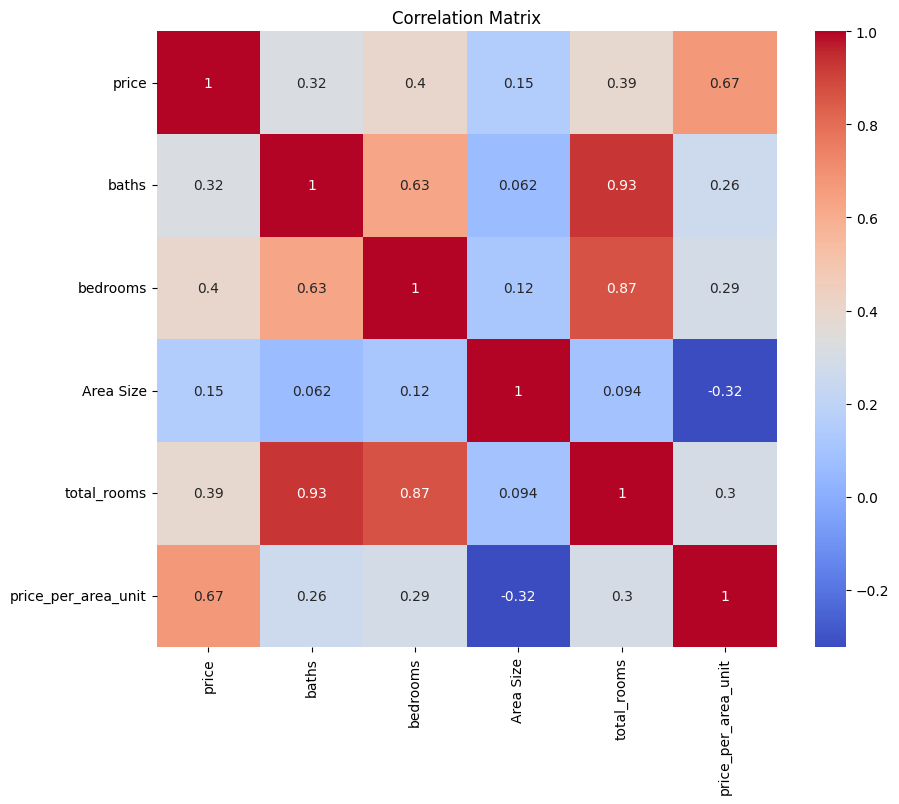

In [216]:

# Correlation Analysis
correlation_matrix = df[['price', 'baths', 'bedrooms', 'Area Size', 'total_rooms', 'price_per_area_unit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

3.2 Investigate the reasons for these outliers. Are there any specific features or combinations of features that contribute to the outliers?

In [217]:
# Investigate specific outliers
for index, row in outliers.iterrows():
    print(f"Property ID: {row['property_id']}")
    print(f"Price: {row['price']}")
    print(f"Location: {row['location']}")
    print(f"Baths: {row['baths']}")
    print(f"Bedrooms: {row['bedrooms']}")
    print(f"Area Size: {row['Area Size']}")
    print(f"Property Type: {row['property_type']}")
    print(f"Total Rooms: {row['total_rooms']}")
    print(f"Price per Area Unit: {row['price_per_area_unit']}")
    print("\n")

Property ID: 1402466
Price: 50000000
Location: Dha defence
Baths: 7
Bedrooms: 7
Area Size: 1.0
Property Type: House
Total Rooms: 14
Price per Area Unit: 50000000.0


Property ID: 785289
Price: 52000000
Location: Gulberg
Baths: 6
Bedrooms: 5
Area Size: 1.0
Property Type: House
Total Rooms: 11
Price per Area Unit: 52000000.0


Property ID: 2821111
Price: 50000000
Location: Gulberg
Baths: 6
Bedrooms: 5
Area Size: 1.0
Property Type: House
Total Rooms: 11
Price per Area Unit: 50000000.0


Property ID: 4017113
Price: 49500000
Location: Dha defence
Baths: 6
Bedrooms: 5
Area Size: 1.0
Property Type: House
Total Rooms: 11
Price per Area Unit: 49500000.0


Property ID: 4111694
Price: 51000000
Location: Dha defence
Baths: 6
Bedrooms: 5
Area Size: 1.0
Property Type: House
Total Rooms: 11
Price per Area Unit: 51000000.0


Property ID: 6025903
Price: 50000000
Location: Wahdat road
Baths: 0
Bedrooms: 0
Area Size: 1.0
Property Type: House
Total Rooms: 0
Price per Area Unit: 50000000.0


Property ID: 6

# 4. Predictive Modeling:

4.1 Train a machine learning model to predict house prices based on the
available features. Popular choices for this task include linear
regression, random forest, or gradient boosting.

In [218]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ['baths', 'bedrooms', 'Area Size', 'total_rooms', 'price_per_area_unit',
            'location_encoded', 'city_encoded', 'province_name_encoded', 'property_type_encoded']
target = 'price'

In [219]:
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
# Check for missing values
missing_values = X_train.isnull().sum()
print("Missing values in training set:\n", missing_values)

missing_values_test = X_test.isnull().sum()
print("Missing values in testing set:\n", missing_values_test)

Missing values in training set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      0
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64
Missing values in testing set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      0
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


In [223]:
# Impute missing values with the median of each column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())
     

In [224]:
# Check for infinite values
inf_values = np.isinf(X_train).sum()
print("Infinite values in training set:\n", inf_values)

inf_values_test = np.isinf(X_test).sum()
print("Infinite values in testing set:\n", inf_values_test)

# Replace infinite values with a large finite number (if any)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Impute the newly introduced NaN values (from replacing infinite values)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

Infinite values in training set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      0
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64
Infinite values in testing set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      0
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


In [226]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [228]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [229]:
# Select features and target variable
features = ['baths', 'bedrooms', 'Area Size', 'total_rooms', 'price_per_area_unit',
            'location_encoded', 'city_encoded', 'province_name_encoded', 'property_type_encoded']
target = 'price'

X = df[features]
y = df[target]

In [230]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
# Check for missing values
missing_values = X_train.isnull().sum()
print("Missing values in training set:\n", missing_values)


Missing values in training set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      0
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


In [269]:
# Impute missing values with the median of each column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [270]:
# Check for infinite values
inf_values = np.isinf(X_train).sum()
print("Infinite values in training set:\n", inf_values)

Infinite values in training set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      8
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


In [271]:
inf_values_test = np.isinf(X_test).sum()
print("Infinite values in testing set:\n", inf_values_test)

Infinite values in testing set:
 baths                    0
bedrooms                 0
Area Size                0
total_rooms              0
price_per_area_unit      4
location_encoded         0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


In [272]:
# Replace infinite values with a large finite number (if any)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

In [273]:
# Impute the newly introduced NaN values (from replacing infinite values)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

In [274]:
# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [275]:
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [276]:
# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train) 
gb_model.fit(X_train_scaled, y_train)


GradientBoostingRegressor(random_state=42)

In [277]:
# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test_scaled)

In [278]:
# Evaluate models
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

In [279]:
lr_r2 = r2_score(y_test, lr_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

4.2 Evaluate the performance of the model using appropriate metrics (e.g.,
mean squared error, R-squared).


In [280]:
# Print evaluation metrics
print("Linear Regression - Mean Squared Error:", lr_mse)
print("Linear Regression - R-squared:", lr_r2)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R-squared:", rf_r2)

print("Gradient Boosting - Mean Squared Error:", gb_mse)
print("Gradient Boosting - R-squared:", gb_r2)
     

Linear Regression - Mean Squared Error: 52221692529076.82
Linear Regression - R-squared: 0.659350919791519
Random Forest - Mean Squared Error: 23011974437.660774
Random Forest - R-squared: 0.9998498898150111
Gradient Boosting - Mean Squared Error: 487726347412.13153
Gradient Boosting - R-squared: 0.9968184958473555


# 5. Future Price Prediction:

5.5 Use the trained model to predict future house prices based on
hypothetical scenarios (e.g., what would be the price of a house with
specific characteristics in a particular location?)

In [281]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

new_data = pd.DataFrame({
    'property_type': ['Flat'], # Categorical features should be encoded the same way as training data
    'location_id': [1234], # Numeric features
    'city': ['Islamabad'],
    'province_name': ['Islamabad Capital'],
    'latitude': [33.6844],
    'longitude': [73.0479],
    'baths': [3],
    'bedrooms': [3],
    'area': ['5 Marla'], # Ensure the same format as training data
    'purpose': ['For Sale'],
    'Area Type': ['Marla'],
    'Area Size': [5.0], # Numeric features
    # Add all other necessary features that were used in training
})

# Encode categorical features to match training data
new_data_encoded = pd.get_dummies(new_data, columns=['property_type', 'city', 'province_name', 'area', 'purpose', 'Area Type'])

# Align columns with the training data
# Ensure that the columns in new_data_encoded match those in X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Check the shape of new_data_encoded to verify alignment
print(new_data_encoded.shape)
print(new_data_encoded.head())

# Predict using the trained model
predicted_prices = random_forest_model.predict(new_data_encoded)

# Output the predicted prices
print("Predicted Prices:", predicted_prices)


(1, 9)
   baths  bedrooms  Area Size  total_rooms  price_per_area_unit  \
0      3         3        5.0            0                    0   

   location_encoded  city_encoded  province_name_encoded  \
0                 0             0                      0   

   property_type_encoded  
0                      0  


AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

# 6. Report and Recommendations:


Prepare a report summarizing your findings, including:
